<a href="https://colab.research.google.com/github/Vinicius-Ikehara/TCC/blob/main/FINAL_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from numpy import array
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from google.colab import files
import io
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.model_selection import train_test_split, cross_val_score


In [ ]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks"
 
df = pd.read_csv(path + '/MULTPL-SP500_PSR_QUARTER.csv')

In [ ]:
df.reset_index(inplace = True)

In [ ]:
df.shape

(118, 3)

In [ ]:
df = df.sort_values('Date')

In [ ]:
data = df

In [ ]:
df = df.loc[:, df.columns!='Date']

In [ ]:
#Dividir uma sequencia não variada em pequenas samples
def split_sequence(sequence, steps):
  X, y = list(), list()
  for start in range(len(sequence)):
    end_index = start + steps #define o index final da sequencia
    if end_index > len(sequence)-1: #checa se o index final está dentro da sequencia
      break
    sequence_x, sequence_y = sequence[start: end_index], sequence[end_index] #extract input and output parts of the sequence
    X.append(sequence_x)
    y.append(sequence_y)
  return array(X), array(y)

In [ ]:
def calc_acuracia(val1, val2):
  resultado = (val1/val2)
  resultado = resultado*100
  return resultado

In [ ]:
del df['index']
valores_reais = np.array(df)

In [ ]:
input_dimension = 20
#input_dimension = 60
#input_dimension = 100

op = 'Adam'
#op = 'SGD'

n_epochs = 6000
#n_epochs = 8000
#n_epochs = 10000

In [ ]:
steps = 3

#split into samples
X,y = split_sequence(valores_reais, steps)

features = 1
X = X.reshape((X.shape[0], X.shape[1], features))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(steps, features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(input_dimension, activation='relu'))
model.add(Dense(input_dimension/2, activation='relu'))
model.add(Dense(1))
model.compile(optimizer= op,loss='mse')
model.fit(X,y, epochs=n_epochs, verbose=0)

In [ ]:
posicao = 0
valor_predito = 0
valor_verdadeiro = 0
acuracia = []
predicoes = []
mse = []
mae = []

In [ ]:
def avaliar_modelo(valor_verdadeiro, pred):
    mse.append(mean_squared_error(valor_verdadeiro, pred))
    mae.append(mean_absolute_error(valor_verdadeiro, pred))
    acuracia.append(calc_acuracia(valor_verdadeiro, pred))
    predicoes.append(round(float(pred), 2))

In [ ]:
def teste_prever_valores(values, valores_reais,valor_predito, valor_verdadeiro,posicao):
    posicao = len(values)-1
    x_input = array([valores_reais[posicao-3], valores_reais[posicao-2],valores_reais[posicao-1]])
    x_input = x_input.reshape((1, steps, features))
    y_pred = model.predict(x_input, verbose=0)
    valor_verdadeiro = valores_reais[posicao]
    avaliar_modelo(valor_verdadeiro, y_pred)
    valor_predito = round(float(y_pred), 2)
    values = np.vstack([values,valor_predito])
    return values

In [ ]:
def prever_valores(values,valor_predito, valor_verdadeiro,posicao):
    posicao = len(values)-1
    x_input = array([values[posicao-3], values[posicao-2],values[posicao-1]])
    x_input = x_input.reshape((1, steps, features))
    y_pred = model.predict(x_input, verbose=0)
    valor_verdadeiro = values[posicao]
    avaliar_modelo(valor_verdadeiro, y_pred)
    valor_predito = round(float(y_pred), 2)
    values = np.vstack([values,valor_predito])
    return values

In [ ]:
title = ("Modelo Duas Camadas( Camada 1:" + str(input_dimension) + " Camada 2: " + str(int(input_dimension/2)) + "), Optimizador: " + op + ", Epochs: " + str(n_epochs))

In [ ]:
def mostrar_avaliacao(mse, mae, acuracia):
    print(title)
    print("Maior valor da MAE:" ,max(mae), "\nMédia da MAE: ", np.mean(mae))
    print("Maior valor da MSE:" ,max(mse), "\nMédia da MSE: ", np.mean(mse))
    print("Menores valores de Acurácia:" ,min(acuracia), max(acuracia))

In [ ]:
predicao = valores_reais

In [ ]:
n = 5

In [ ]:
i = 0
while i < n:
  predicao = prever_valores(predicao, valor_predito, valor_verdadeiro, posicao)
  i += 1

In [ ]:
n = len(valores_reais) -3 

In [ ]:
teste_cego = df.iloc[:len(valores_reais)-n]
teste_cego = np.array(teste_cego)

In [ ]:
i = 0
while i < n:
  teste_cego = teste_prever_valores(teste_cego, valores_reais, valor_predito, valor_verdadeiro, posicao)
  i += 1
  if(i==n):
    mostrar_avaliacao(mse,mae,acuracia)

Modelo Duas Camadas( Camada 1:20 Camada 2: 10), Optimizador: Adam, Epochs: 6000
Maior valor da MAE: 0.3683411312103271 
Média da MAE:  0.08005442885557809
Maior valor da MSE: 0.1356751889413034 
Média da MSE:  0.010709999357787629
Menores valores de Acurácia: [[82.95490762]] [[116.13030844]]


In [ ]:
i = 0
n=5
while i < n:
  teste_cego = prever_valores(teste_cego, valor_predito, valor_verdadeiro, posicao)
  i += 1

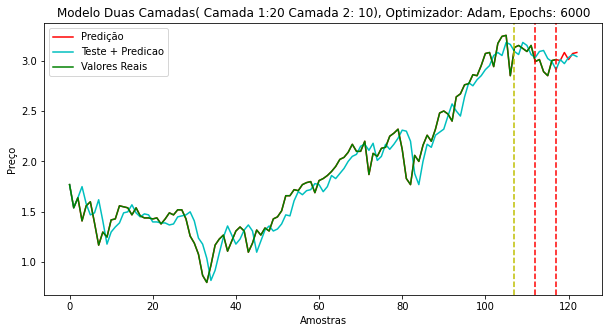

In [ ]:
import matplotlib.pyplot as plt
# plotting the line 1 points 
plt.figure(figsize=(10,5))
plt.plot(predicao, label = "Predição", c='r')
plt.plot(teste_cego, label = "Teste + Predicao", c='c')
plt.plot(valores_reais, label = "Valores Reais", c='g')
plt.axvline(x=len(valores_reais)-11, c='y', linestyle='--')
plt.axvline(x=len(valores_reais)-6, c='r', linestyle='--')
plt.axvline(x=len(valores_reais)-1, c='r', linestyle='--')
plt.xlabel('Amostras')
# Set the y axis label of the current axis.
plt.ylabel('Preço')
# Set a title of the current axes.
plt.title(title)
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()